In [1]:
import numpy as np
import matplotlib.pyplot as plt

# find the a & b points
def get_bezier_coef(points):
    # since the formulas work given that we have n+1 points
    # then n must be this:
    n = len(points) - 1

    # build coefficents matrix
    C = 4 * np.identity(n)
    np.fill_diagonal(C[1:], 1)
    np.fill_diagonal(C[:, 1:], 1)
    C[0, 0] = 2
    C[n - 1, n - 1] = 7
    C[n - 1, n - 2] = 2

    # build points vector
    P = [2 * (2 * points[i] + points[i + 1]) for i in range(n)]
    P[0] = points[0] + 2 * points[1]
    P[n - 1] = 8 * points[n - 1] + points[n]

    # solve system, find a & b
    A = np.linalg.solve(C, P)
    B = [0] * n
    for i in range(n - 1):
        B[i] = 2 * points[i + 1] - A[i + 1]
    B[n - 1] = (A[n - 1] + points[n]) / 2

    return A, B

# returns the general Bezier cubic formula given 4 control points
def get_cubic(a, b, c, d):
    return lambda t: np.power(1 - t, 3) * a + 3 * np.power(1 - t, 2) * t * b + 3 * (1 - t) * np.power(t, 2) * c + np.power(t, 3) * d

# return one cubic curve for each consecutive points
def get_bezier_cubic(points):
    A, B = get_bezier_coef(points)
    return [
        get_cubic(points[i], A[i], B[i], points[i + 1])
        for i in range(len(points) - 1)
    ]

# evalute each cubic curve on the range [0, 1] sliced in n points
def evaluate_bezier(points, n):
    curves = get_bezier_cubic(points)
    return np.array([fun(t) for fun in curves for t in np.linspace(0, 1, n)])

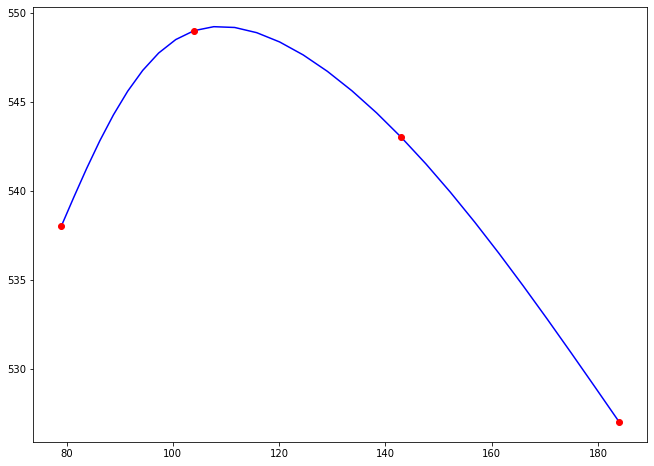

In [12]:
#points = np.random.rand(5, 2)



# fit the points with Bezier interpolation
# use 50 points between each consecutive points to draw the curve
path = evaluate_bezier(points, 10)

# extract x & y coordinates of points
x, y = points[:,0], points[:,1]
px, py = path[:,0], path[:,1]

# plot
plt.figure(figsize=(11, 8))
plt.plot(px, py, 'b-')
plt.plot(x, y, 'ro')
plt.show()

In [14]:
path

array([[ 79.        , 538.        ],
       [ 81.38271605, 539.64654778],
       [ 83.79506173, 541.26127115],
       [ 86.26666667, 542.81234568],
       [ 88.82716049, 544.26794696],
       [ 91.50617284, 545.59625057],
       [ 94.33333333, 546.7654321 ],
       [ 97.3382716 , 547.74366712],
       [100.55061728, 548.49913123],
       [104.        , 549.        ],
       [104.        , 549.        ],
       [107.70562414, 549.22295382],
       [111.64499314, 549.17869227],
       [115.78518519, 548.88641975],
       [120.09327846, 548.36534065],
       [124.53635117, 547.63465935],
       [129.08148148, 546.71358025],
       [133.6957476 , 545.62130773],
       [138.34622771, 544.37704618],
       [143.        , 543.        ],
       [143.        , 543.        ],
       [147.63017833, 541.50827618],
       [152.2340192 , 539.91559214],
       [156.81481481, 538.2345679 ],
       [161.37585734, 536.4778235 ],
       [165.92043896, 534.65797897],
       [170.45185185, 532.78765432],
 

In [3]:
points

array([[0.72735764, 0.91637564],
       [0.59482968, 0.85624803],
       [0.98733747, 0.68678391],
       [0.63707592, 0.44218859],
       [0.96168728, 0.96879138]])

In [7]:
points = np.array([[ 79, 538],
       [104, 549],
       [143, 543],
       [184, 527]])

